# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

In [24]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

## 1. Create a 4 dimensional data set with 64 elements and show all 4 scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$,  $x_3$ vs. $y$, $x_4$ vs. $y$

In [25]:
n = 64
x = np.linspace(0, 1, n) + np.random.rand(4, n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0, 1, n) + np.random.rand(n) - 1

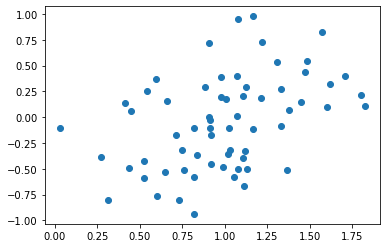

In [26]:
plt.scatter(x.T[0], y)

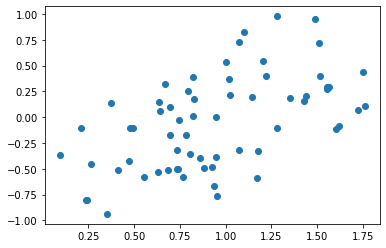

In [27]:
plt.scatter(x.T[1], y)

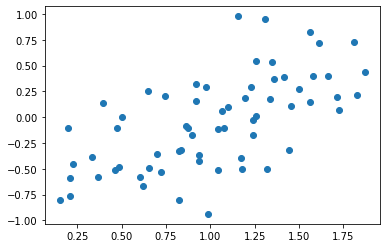

In [28]:
plt.scatter(x.T[2], y)

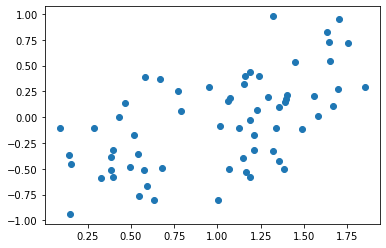

In [29]:
plt.scatter(x.T[3], y)

## 2.  Create a Linear Regression model (like we did in class) to fit the data. *Use the example from Lesson 3 and do not use a library that calculates automatically*. We are expecting 5 coefficients to describe the linear model. 

## After creating the model (finding the coefficients), create a new column $y_p=\Sigma\beta_n\cdot x_n$ 

In [30]:
left = np.linalg.inv(np.dot(x.T, x))

In [31]:
right = np.dot(y.T, x)

In [32]:
beta = np.dot(left, right)
beta

array([-0.00183756,  0.2920923 ,  0.37903077,  0.16223918, -0.87298308])

In [33]:
pred = np.dot(x, beta)

## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

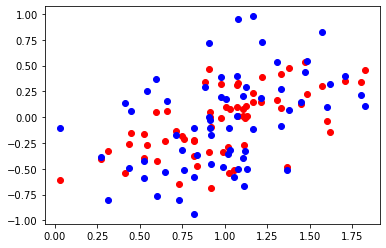

In [34]:
plt.scatter(x.T[0], pred, c='red')
plt.scatter(x.T[0], y, c='b')

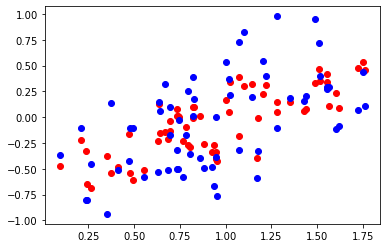

In [35]:
plt.scatter(x.T[1], pred, c='red')
plt.scatter(x.T[1], y, c='b')

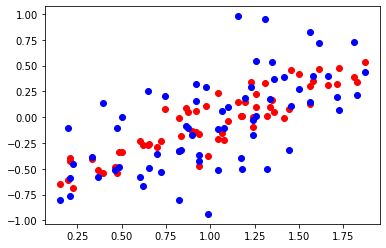

In [36]:
plt.scatter(x.T[2], pred, c='red')
plt.scatter(x.T[2], y, c='b')

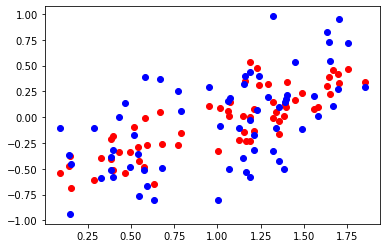

In [37]:
plt.scatter(x.T[3], pred, c='red')
plt.scatter(x.T[3], y, c='b')

## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating (Column `Rating`)

In [38]:
import pandas as pd
credit = pd.read_csv('../data/Credit.csv',index_col=0)
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [39]:
columns = ['Income', 'Limit','Age','Education','Balance']
X = credit[columns].values

X = np.vstack([X.T, np.ones(len(X))]).T
X

array([[1.48910e+01, 3.60600e+03, 3.40000e+01, 1.10000e+01, 3.33000e+02,
        1.00000e+00],
       [1.06025e+02, 6.64500e+03, 8.20000e+01, 1.50000e+01, 9.03000e+02,
        1.00000e+00],
       [1.04593e+02, 7.07500e+03, 7.10000e+01, 1.10000e+01, 5.80000e+02,
        1.00000e+00],
       ...,
       [5.78720e+01, 4.17100e+03, 6.70000e+01, 1.20000e+01, 1.38000e+02,
        1.00000e+00],
       [3.77280e+01, 2.52500e+03, 4.40000e+01, 1.30000e+01, 0.00000e+00,
        1.00000e+00],
       [1.87010e+01, 5.52400e+03, 6.40000e+01, 7.00000e+00, 9.66000e+02,
        1.00000e+00]])

In [40]:
y = credit['Rating']
y

1      283
2      483
3      514
4      681
5      357
      ... 
396    307
397    296
398    321
399    192
400    415
Name: Rating, Length: 400, dtype: int64

In [41]:
left_2 = np.linalg.inv(np.dot(X.T, X))
right_2 = np.dot(y.T, X)
beta_2 = np.dot(left_2, right_2)
pred_2 = np.dot(X, beta_2)

### 5. Plot your results using scatter plots (just like in class). Show as many of your columns vs. credit rating that you can.

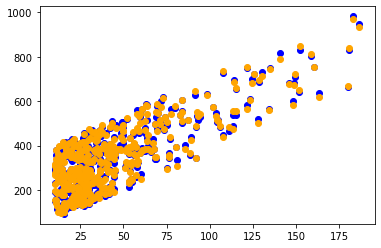

In [42]:
plt.scatter(X.T[0], y, c='b')
plt.scatter(X.T[0], pred_2, c='orange')

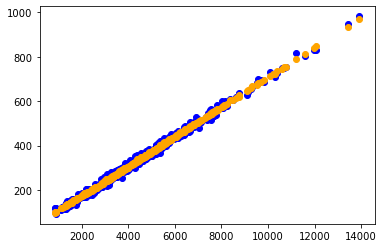

In [43]:
plt.scatter(X.T[1], y, c='b')
plt.scatter(X.T[1], pred_2, c='orange')

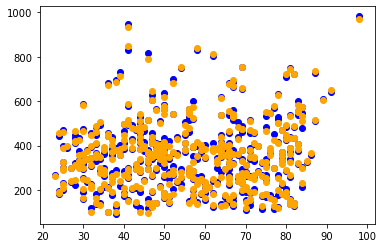

In [44]:
plt.scatter(X.T[2], y, c='b')
plt.scatter(X.T[2], pred_2, c='orange')

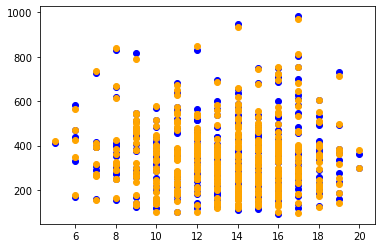

In [45]:
plt.scatter(X.T[3], y, c='b')
plt.scatter(X.T[3], pred_2, c='orange')

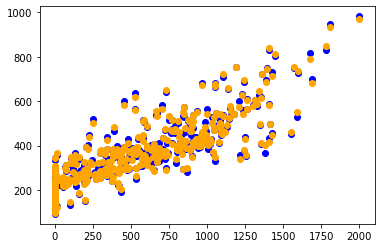

In [46]:
plt.scatter(X.T[4], y, c='b')
plt.scatter(X.T[4], pred_2, c='orange')